In [118]:
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from IPython.display import display
import copy
import seaborn as sns

from util import *

In [119]:
train_in_one_data = read_data_for_transformer('datas/logs/train_in_one_seed1_5.txt')
sperately_data = read_data_for_transformer('datas/logs/spearately_for_train_in_one_problem_seed1_5.txt')
sperately_data_for_not_in_train_in_one = read_data_for_transformer('datas/logs/spearately_for_not_in_train_in_one.txt')

In [122]:
# draw continue
j=1 # begin from 1, jump problem1

problem_set = [2,11,18,19,22,23]
problem_num = 7 # continal problem
ground_truth = [-100,-100,-5,-220,-100,0]
#problem_set = [3,4,5,6,7,8,9,10,12,13,14,15,16,17,20,21]
data = {}
for problem in problem_set:

    print(f'problem{problem}')

    epochs = []
    means = []
    stds = []
    means2 = []
    stds2 = []
    max = -1000000
    min = 1000000000
    for i in range(100):
        piece = []
        piece.append(train_in_one_data[j*100 + i][2])
        piece.append(train_in_one_data[problem_num*100+ j*100 + i][2])
        piece.append(train_in_one_data[problem_num*100*2 + j*100 + i][2])
        piece.append(train_in_one_data[problem_num*100*3 + j*100 + i][2])

        mean = np.mean(piece)
        var = np.var(piece)
        epochs.append(i*16)
        #epochs.append(i * 16)
        #means.append(mean)
        means.append(-mean)
        stds.append(var)

        piece = []
        piece.append(sperately_data[(j-1)*100 + i][2])
        piece.append(sperately_data[700+ (j-1)*100 + i][2])
        piece.append(sperately_data[1400 + (j-1)*100 + i][2])
        piece.append(sperately_data[2100 + (j-1)*100 + i][2])

        mean2 = np.mean(piece)
        var2 = np.var(piece)
        #means2.append(mean2)
        means2.append(-mean2)
        stds2.append(var2)

        if max<-mean: max = -mean
        if max<-mean2:max=-mean2
        if min>-mean: min = -mean
        if min>-mean2:min=-mean2
        
    data.update({f'Means_{problem}': means,f'S_Means_{problem}': means2, f'Vars_{problem}': stds,f'S_Vars_{problem}': stds2})
    j = j + 1
data.update({'Epoch': epochs})
df = pd.DataFrame(data)
display(df)

problem2
problem11
problem18
problem19
problem22
problem23


,Means_2,S_Means_2,Vars_2,S_Vars_2,Means_11,S_Means_11,Vars_11,S_Vars_11,Means_18,S_Means_18,...,S_Vars_19,Means_22,S_Means_22,Vars_22,S_Vars_22,Means_23,S_Means_23,Vars_23,S_Vars_23,Epoch
0,42.804167,65.482987,109.944870,5370.055224,51.802083,-4723.110917,169.501480,6.883324e+07,2.579879,-3543.805446,...,1.289460e+07,-5290.402083,-2592.419792,1.826295e+07,7.832477e+06,-2060.887500,-677.149669,564612.685990,1.465351e+06,0
1,45.257292,70.557472,110.682390,5630.068020,54.157292,-2344.694323,166.087434,1.754566e+07,2.618497,-2274.646736,...,1.466799e+06,-4210.128125,-3477.143750,1.368475e+07,1.934759e+07,-1974.539583,-661.913300,547327.496758,1.405128e+06,16
2,49.061458,72.417758,134.257625,5836.305556,52.326042,-1076.219272,213.492338,3.973885e+06,2.758179,-2005.379542,...,1.656699e+06,-2879.878125,-2640.645833,3.992664e+06,1.058932e+07,-1551.458333,-497.618194,621000.086953,8.084918e+05,32
3,48.010417,75.956266,100.764345,5648.859746,56.077083,-1768.655151,123.969570,1.025705e+07,2.940560,-1867.256861,...,2.208223e+06,-1631.136458,-1847.384375,8.353718e+05,3.736546e+06,-1206.519792,-580.901135,276416.776028,1.101207e+06,48
4,50.579167,75.171642,96.708273,5333.018437,59.350000,-1662.126567,113.972717,9.096944e+06,2.932728,-1772.884150,...,1.371492e+06,-1698.605208,-1418.862500,1.312459e+06,2.252970e+06,-1126.067708,-502.781953,266520.740394,8.341463e+05,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,68.090625,88.639834,30.063285,5690.222739,65.673958,92.877725,0.718510,5.596919e+03,3.748358,-355.836749,...,6.827329e+03,15.944792,-121.220833,3.666035e+03,9.095776e+04,-330.634375,-447.004993,110410.470342,7.200550e+05,1520
96,67.775000,87.912886,38.445521,5696.106017,65.473958,92.707698,0.359309,5.573324e+03,3.738984,-416.292486,...,8.277738e+03,-0.111458,-126.183333,3.470817e+03,9.496145e+04,-264.793750,-121.139512,36899.051654,8.033736e+04,1536
97,66.814583,88.456872,41.170490,5686.071748,65.070833,92.249181,0.415634,5.592209e+03,3.781014,-210.136406,...,6.341309e+03,-478.447917,-121.140625,7.160351e+05,8.935547e+04,-526.565625,29.197025,259536.075498,1.194529e+03,1552
98,64.632292,88.555382,64.827746,5703.786301,65.217708,77.171265,2.460594,6.179941e+03,3.726078,-181.769682,...,6.717134e+03,-31.818750,-132.283333,7.588492e+03,9.776215e+04,-713.138542,-20.134368,672217.573649,1.217099e+04,1568


,Means_2,S_Means_2,Vars_2,S_Vars_2,Means_11,S_Means_11,Vars_11,S_Vars_11,Means_18,S_Means_18,...,S_Vars_19,Means_22,S_Means_22,Vars_22,S_Vars_22,Means_23,S_Means_23,Vars_23,S_Vars_23,Epoch
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47.142500,71.917225,110.471500,5563.661397,54.742500,-2314.961246,157.404708,2.194136e+07,2.765969,-2292.794547,...,3.919562e+06,-3142.030000,-2395.291250,7.617638e+06,8.751781e+06,-1583.894583,-584.072850,455175.557224,1.122865e+06,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,67.106250,88.591237,39.601053,5688.878192,65.768125,34.433595,0.374597,3.344956e+04,3.743967,-228.904382,...,1.639402e+04,-149.332917,-139.267083,2.135380e+05,1.100331e+05,-318.361042,-264.104386,68139.453529,3.148541e+05,1488.0
96,67.327500,88.479328,35.706621,5691.440848,65.762917,52.205518,0.431272,2.887358e+04,3.741591,-271.471362,...,1.669622e+04,-150.201458,-124.429583,2.134714e+05,9.275767e+04,-315.652500,-252.013790,67305.653713,3.005493e+05,1504.0
97,67.557083,88.375375,37.337009,5691.891584,65.568750,52.051016,0.509383,2.887704e+04,3.748572,-274.712469,...,1.662606e+04,-150.779375,-123.867292,2.124680e+05,9.224282e+04,-346.948542,-208.218262,98369.444235,2.681911e+05,1520.0
98,67.027500,88.439664,41.605318,5695.994605,65.371667,88.612762,0.970784,5.712414e+03,3.745798,-273.066128,...,1.660554e+04,-158.420417,-125.867917,2.130794e+05,9.365952e+04,-427.011250,-174.387210,226402.076370,2.382699e+05,1536.0


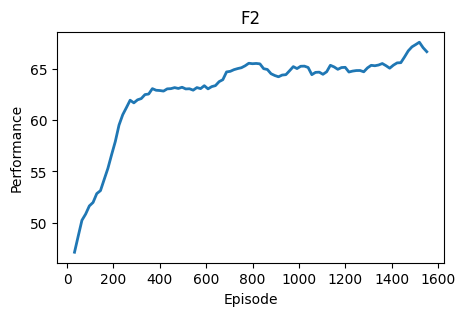

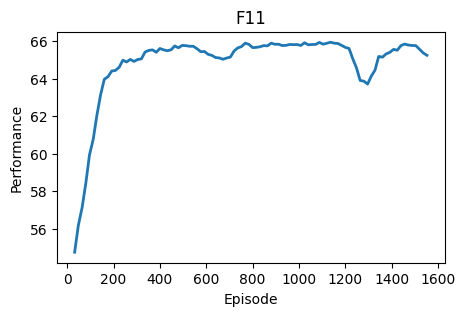

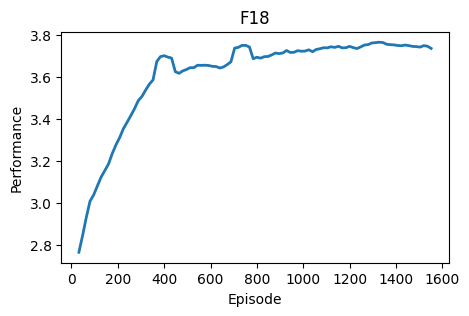

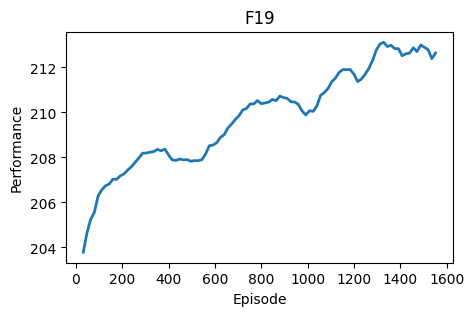

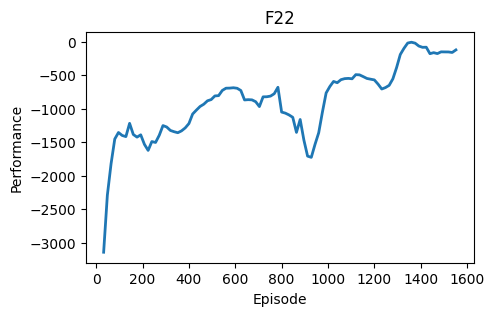

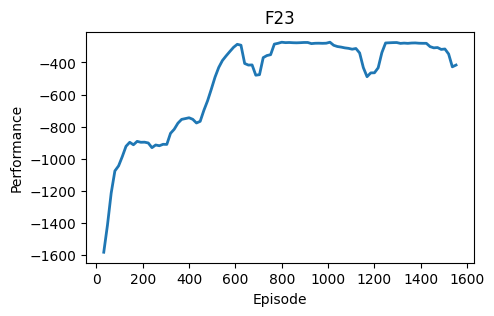

In [123]:
# draw  continue learn problem 

_new_df = copy.deepcopy(df)
new_df = _new_df.rolling(window=5, center=False).mean() 
display(new_df)

for problem in problem_set:
    plt.figure(figsize=(5, 3))
    plot_each(plt, new_df['Epoch'], new_df[f'Means_{problem}'], new_df[f'Vars_{problem}'], f'problem{problem}',show_stds=False)
    # 添加图表元素
    plt.title(f'F{problem}')
    plt.xlabel('Episode')
    plt.ylabel('Performance')

Draw continue and single, Pig.5.

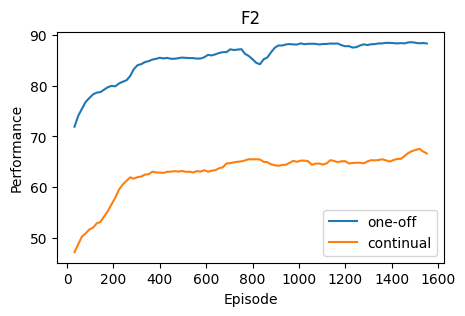

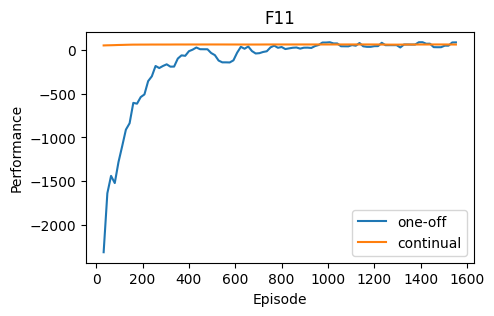

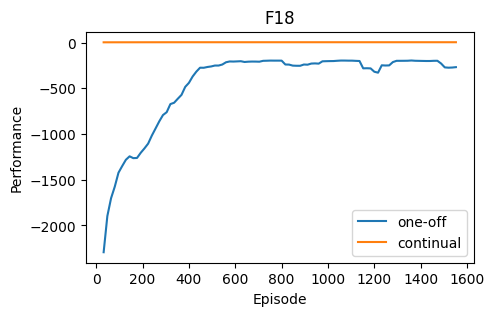

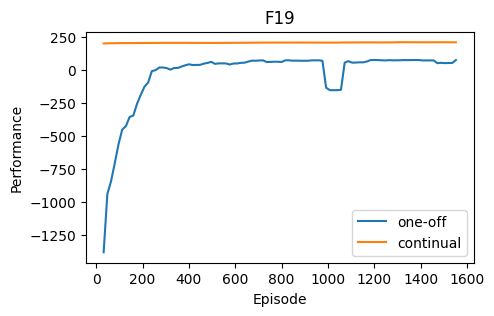

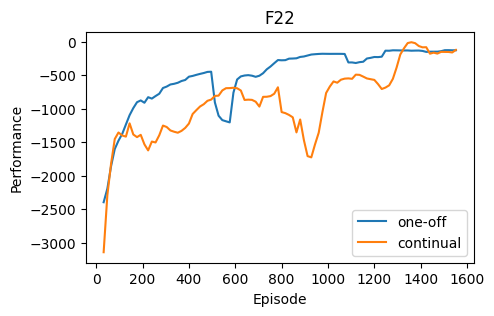

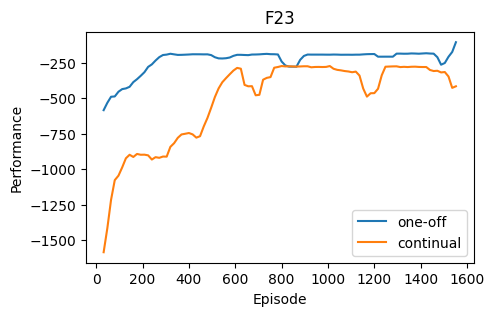

In [124]:
for problem in problem_set:
    plt.figure(figsize=(5, 3))
    g = sns.lineplot(data=new_df, x='Epoch', y=f'S_Means_{problem}',label = 'one-off')
    g = sns.lineplot(data=new_df, x='Epoch', y=f'Means_{problem}',label = 'continual')
    plt.title(f'F{problem}')
    plt.xlabel('Episode')
    plt.ylabel('Performance')
    plt.legend()

    #plt.savefig(f'continue_problem\F{problem}.svg',dpi=300,format="svg",bbox_inches = 'tight')

Below draw small picture in above picture, Pic.5.

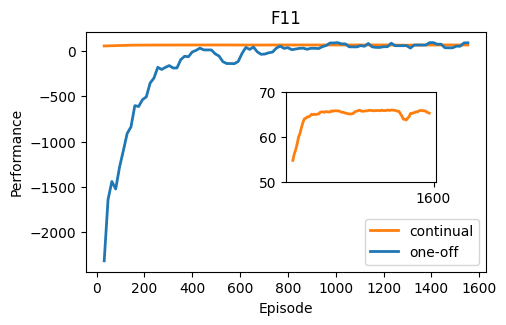

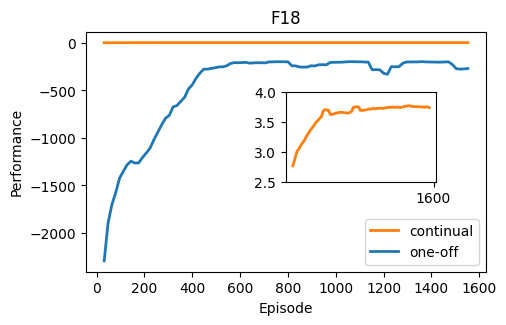

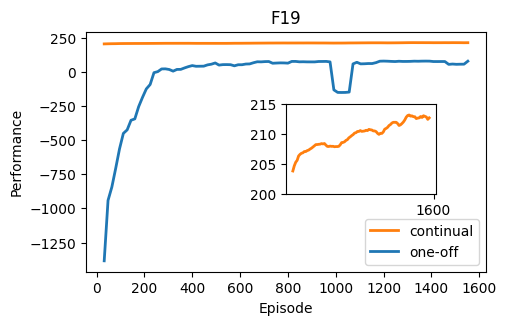

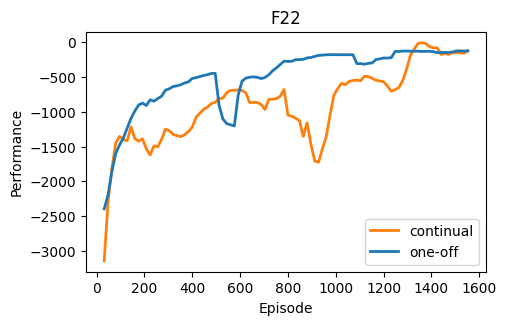

In [125]:
#draw small picture

problem_set = [11,18,19,22]
slim = {11:[50,70],18:[2.5,4],19:[200,215]}
for problem in problem_set:
    
    pig = plt.figure(figsize=(5, 3))
    
    ax1 = pig.add_axes([0.1,0.1,0.8,0.8])
    if problem != 22:
        if problem == 19:
            ax2 = pig.add_axes([0.5,0.36,0.3,0.3])
        else:
            ax2 = pig.add_axes([0.5,0.4,0.3,0.3])
    
    plot_each(ax1, new_df['Epoch'], new_df[f'Means_{problem}'], None,  'continual')
    plot_each(ax1, new_df['Epoch'], new_df[f'S_Means_{problem}'], None,  'one-off')
    if problem != 22:
        plot_each(ax2, new_df['Epoch'], new_df[f'Means_{problem}'], None,  'continual')
    
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Performance')
    ax1.set_title(f'F{problem}')
    ax1.legend()
    if problem != 22:
        ax2.set_ylim(slim[problem]) 
        ax2.set_xticks([1600]) 
    # plt.title(f'F{problem}')
    # plt.xlabel('Episode')
    # plt.ylabel('Performance')

    plt.savefig(f'result_pictures/continue_problem\F{problem}.svg',dpi=300,format="svg",bbox_inches = 'tight')

In [126]:
pkls=['performance\problem21_04_24_18_57.pkl','performance\problem21_04_24_20_39.pkl','performance\problem21_04_24_22_14.pkl']
datas = read_from_pkl(pkls)
#print(len(datas))
total = {}
total_mid = []
total_max = []
for data in datas:
    # 100 epoch
    mid=[]
    max= []
    for i in range(100):
        #one epoch: 16 alg
        alg_means=[]
        for j in range(16):
            #print(data[i][j])
            #print(data[i][j].mean())
            alg_means.append(data[i][j].mean())
        alg_means_np = np.array(alg_means)
        mid.append(np.median(alg_means_np))
        max.append(np.max(alg_means_np))
    total_mid.append(mid)
    total_max.append(max)

# make mean between seeds
total_mid_np = np.mean(np.array(total_mid),axis =0)
total_max_np = np.mean(np.array(total_max),axis =0)
total_mid_std_np = np.var(np.array(total_mid),axis =0)
total_max_std_np = np.var(np.array(total_max),axis =0)


epochs = [num for num in range(100)]
data = {}
data.update({f'mid': total_mid_np,f'max': total_max_np,'mid_std':total_mid_std_np,'max_std':total_max_std_np,'epochs':epochs})
     
df = pd.DataFrame(data)
display(df)



3


,mid,max,mid_std,max_std,epochs
0,-493.044444,-426.244444,601.405432,97.615802,0
1,-536.444444,-417.800000,188.969877,185.042963,1
2,-551.711111,-458.111111,123.829136,2296.466173,2
3,-561.155556,-445.888889,423.479506,923.049877,3
4,-561.822222,-486.777778,164.771358,2619.405432,4
...,...,...,...,...,...
95,-611.333333,-564.955556,430.675556,2654.486914,95
96,-614.400000,-572.377778,461.069630,1443.251358,96
97,-612.977778,-557.755556,438.134321,613.325432,97
98,-613.755556,-606.022222,488.320988,351.126914,98


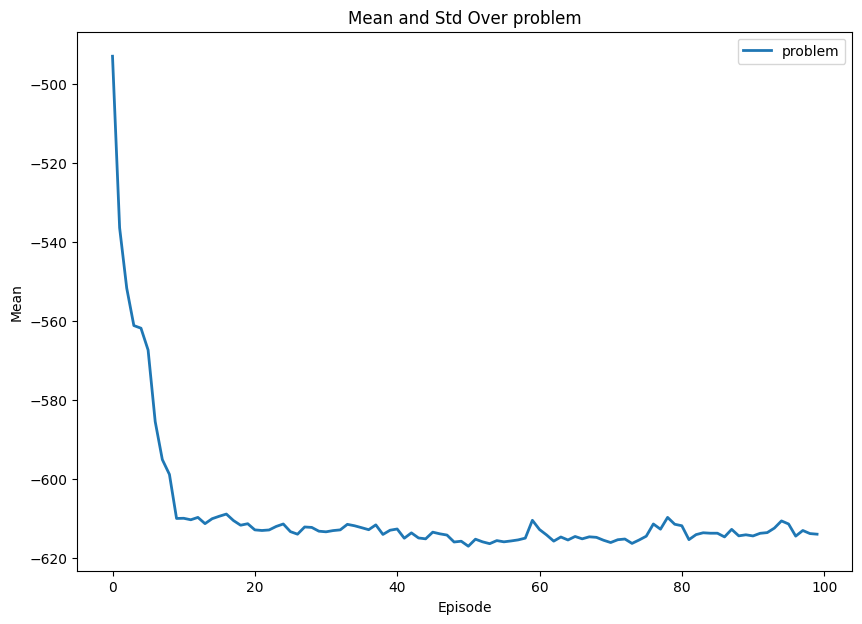

In [127]:
plt.figure(figsize=(10, 7))

plot_each(plt, epochs, total_mid_np, total_mid_std_np, f'problem',show_stds=False)

plt.title(f'Mean and Std Over problem')
plt.xlabel('Episode')
plt.ylabel('Mean')
plt.legend()

plt.show()
#plt.savefig(f'{folder_name}\problem{problem}.png')